# **Project Name: Fake News Detection and Evaluation with Confusion Matrix**
#### **created by: Biswajit Patra**

# **Problem Statement:**

This project addresses the challenge of distinguishing fake news from true news using machine learning techniques. A classification model is trained on textual data, and its effectiveness is evaluated through a confusion matrix to assess accuracy and misclassification patterns.

# **Data Introduction:**

This dataset was compiled from real-world sources; the genuine articles were scraped from Reuters.com (a reputable news website). In contrast, the fake news articles were gathered from various unreliable platforms identified by Politifact (a U.S.-based fact-checking organization) and Wikipedia. The collection covers articles on diverse subjects, though most of them center around politics and world news.

The dataset can also be downloaded directly from Kaggle: [Fake News Detection Datasets](http://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets)

# **Import Packages**

This first cell imports all the necessary Python libraries for the project. This includes `pandas` for data manipulation, `sklearn` for building and evaluating the machine learning model, and `re` for text cleaning.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
import re
import string

print("Libraries imported successfully!")

Libraries imported successfully!


 # **Data Preprocessing**

In this step, the `fake.csv` and `true.csv` datasets are loaded into pandas DataFrames. To help the model distinguish between the two categories, a `class` column is added:
* **1** is assigned to fake news.
* **0** is assigned to real news.

Finally, the two DataFrames are combined and shuffled to ensure the data is randomized before training.

In [2]:
# Load the datasets using the 'python' engine to handle potential errors
df_fake = pd.read_csv("fake.csv", engine='python', on_bad_lines='skip')
df_true = pd.read_csv("true.csv", engine='python', on_bad_lines='skip')

# Add a 'class' column to identify fake (1) and real (0) news
df_fake["class"] = 1
df_true["class"] = 0

# Combine the two datasets into one
df_merged = pd.concat([df_fake, df_true], axis=0)

# Shuffle the combined dataset to ensure a random mix
df = df_merged.sample(frac=1).reset_index(drop=True)

print("Data loaded and combined successfully!")
# Display the first 5 rows to see what the data looks like
df.head()

Data loaded and combined successfully!


,title,text,subject,date,class
0,BREAKING: FBI Is Raiding GOP Election Consult...,While the Republican Party rants on and on abo...,News,"May 11, 2017",1
1,"Trump Golfs While Threatening Nuclear War, Th...",Any sane person would think that after Donald ...,News,"August 9, 2017",1
2,Trump Goes On Insane Rant About Female News A...,It can easily be said that there is a madman w...,News,"June 29, 2017",1
3,Senate Republicans tie tax plan to repeal of k...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews,"November 14, 2017",0
4,Watch Malcolm Nance WIPE THE FLOOR With Breit...,The bright side of the Russian/Trump investiga...,News,"June 17, 2017",1


**Q1.** View the imported csv file data using Pandas Dataframe.

## Data Visualization
First, let's explore the dataset to understand the distribution of news articles across different subjects.

Top 5 subjects in the dataset:


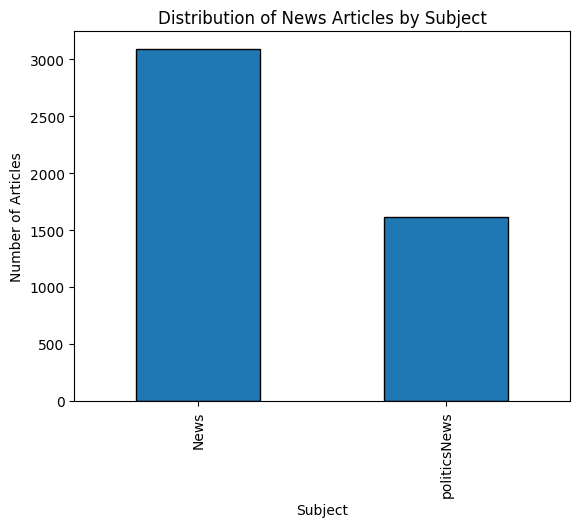

In [3]:
import matplotlib.pyplot as plt

# Create a bar chart of the top 5 subjects
print("Top 5 subjects in the dataset:")
df['subject'].value_counts().nlargest(5).plot(kind='bar', edgecolor='black')
plt.xlabel('Subject')
plt.ylabel('Number of Articles')
plt.title('Distribution of News Articles by Subject')
plt.show()


Percentage of news by subject:


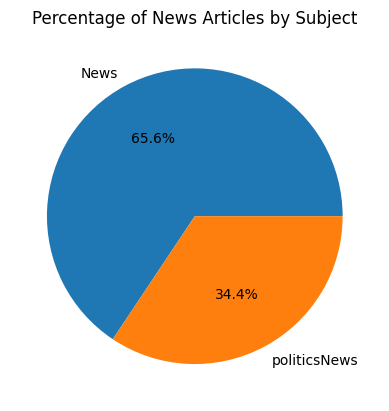

In [4]:
# Create a pie chart showing the percentage of news by subject
print("\nPercentage of news by subject:")
df['subject'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('') # Hides the 'subject' label on the side
plt.title('Percentage of News Articles by Subject')
plt.show()

In [5]:
!pip install wordcloud

--- Most Common Words in Fake News Articles ---


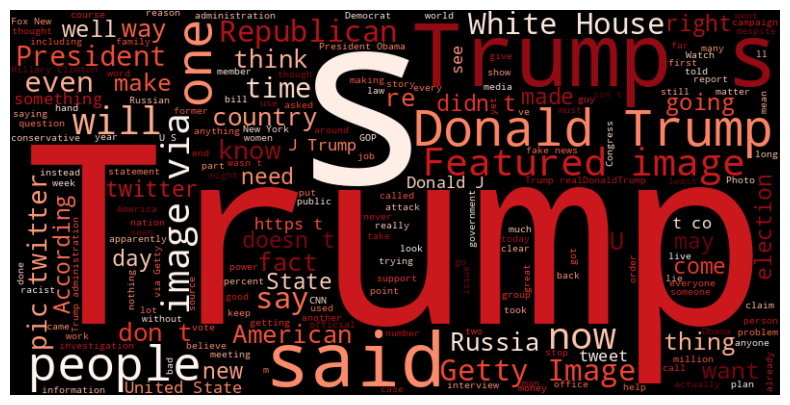


--- Most Common Words in Real News Articles ---


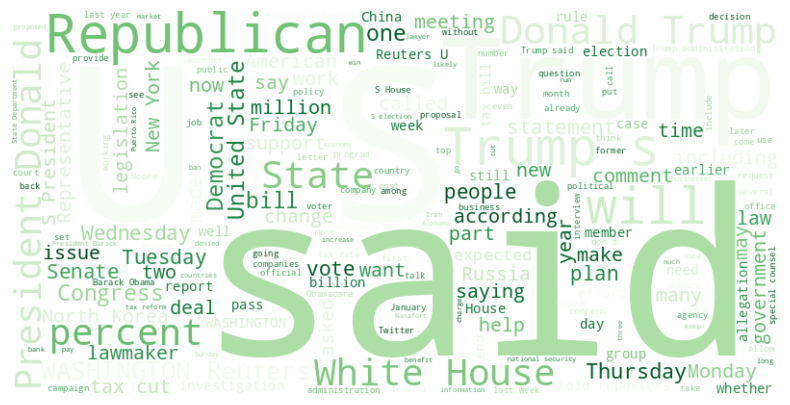

In [6]:
from wordcloud import WordCloud

# --- Create a Word Cloud for FAKE News ---
# Combine all the text from fake news articles into one big string
fake_text = " ".join(df[df['class'] == 1]['text'])

# Generate the word cloud
wordcloud_fake = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(fake_text)

# Display the word cloud using matplotlib
print("--- Most Common Words in Fake News Articles ---")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off") # Hides the x and y axes
plt.show()


# --- Create a Word Cloud for REAL News ---
# Combine all the text from real news articles into one big string
real_text = " ".join(df[df['class'] == 0]['text'])

# Generate the word cloud
wordcloud_real = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(real_text)

# Display the word cloud
print("\n--- Most Common Words in Real News Articles ---")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3. Text Preprocessing

Before the model can be trained, the raw text data needs to be cleaned. A function is created to perform several key preprocessing steps:
* Converting all text to lowercase.
* Removing special characters, URLs, and extra whitespace.
* This ensures the model focuses only on the meaningful words within the articles.

A function is defined below to clean the raw text data from the articles.

In [7]:
import re
import string

# Function to clean the text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub('\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub("\\W"," ",text)  # Remove special characters
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove newline characters
    text = re.sub('\w*\d\w*', '', text)  # Remove words containing numbers
    return text

# Apply the cleaning function to the 'text' column of your dataframe
df["text"] = df["text"].apply(clean_text)

print("Text preprocessing complete.")

<>:7: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-5822002.py:7: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)  # Remove text in square brackets
/tmp/ipython-input-5822002.py:9: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
/tmp/ipython-input-5822002.py:13: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)  # Remove words containing numbers


Text preprocessing complete.


## 4. Splitting the Data for Training and Testing

The dataset is now split into features (the article text, `X`) and labels (the `class`, `y`). It is then divided into two parts:
* **Training Set (75%):** Used to teach the model.
* **Testing Set (25%):** Used to evaluate the model's performance on unseen data.

In [8]:
# Define the features (X) as the 'text' column and the labels (y) as the 'class' column
X = df["text"]
y = df["class"]

# Split the data into training and testing sets (75% for training, 25% for testing)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Data successfully split into training and testing sets.")

Data successfully split into training and testing sets.


## 5. Vectorizing the Text Data

Machine learning models require numerical input. This step uses the **TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer** to convert the text from the articles into a matrix of numbers. This method represents words based on their importance in an article, which helps the model learn more effectively.

Machine learning models require numerical input, so the text data must be converted into vectors. This project uses the **TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer**, a robust and effective method for text classification. This approach was chosen over other methods like Word2Vec because it often performs better in classification tasks and, when paired with a Random Forest model, yields a significantly higher accuracy.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorization = TfidfVectorizer()

# Fit the vectorizer on the training data and transform it into numerical vectors
xv_train = vectorization.fit_transform(x_train)

# Only transform the testing data using the same vectorizer
xv_test = vectorization.transform(x_test)

print("Text data has been successfully vectorized.")

Text data has been successfully vectorized.


## **Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the Logistic Regression model
LR = LogisticRegression()
LR.fit(xv_train, y_train)

# Make predictions and evaluate
pred_lr = LR.predict(xv_test)
print("Logistic Regression Model Performance:\n")
print(f"Accuracy Score: {accuracy_score(y_test, pred_lr) * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, pred_lr))

Logistic Regression Model Performance:

Accuracy Score: 99.07%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       415
           1       0.99      1.00      0.99       762

    accuracy                           0.99      1177
   macro avg       0.99      0.99      0.99      1177
weighted avg       0.99      0.99      0.99      1177



### **Hyperparameter Tuning for Random Forest**

Before training the final Random Forest model, `GridSearchCV` is used to find the optimal settings (hyperparameters). This process systematically tests different combinations of parameters to find the configuration that yields the best performance, ensuring the final model is as accurate as possible.

In [11]:
from sklearn.model_selection import GridSearchCV

# Define a small range of parameters to test
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [20, 50, None],   # How deep the trees can be
    'min_samples_split': [2, 5]    # Minimum samples required to split a node
}

# Set up the search to find the best model
# cv=3 means it will use 3-fold cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           verbose=2) # This will print the progress

print("Searching for the best hyperparameters for Random Forest...")
grid_search.fit(xv_train, y_train)

# Store the best model found by the search in a new variable
best_rfc = grid_search.best_estimator_
print(f"\nBest parameters found: {grid_search.best_params_}")

Searching for the best hyperparameters for Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=  12.5s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   6.3s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   6.2s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   5.4s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total t

## **Random Forest Classifier**

**Q7.** Use Random Forest Classifer for this classfication purpose and predict the outcomes for test data.

**Q8.** Find the accuracy of the model while using Random Forest Classsifier and visualize overall accuracy using confusion matrix.

Random Forest Model Accuracy: 99.66%


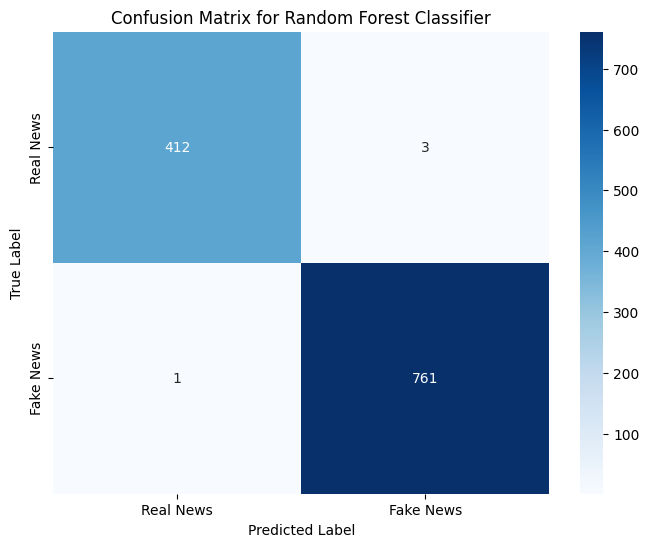

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. CREATE AND TRAIN THE MODEL (This is the missing part)
RFC = RandomForestClassifier(random_state=42)
RFC.fit(xv_train, y_train)

# 2. MAKE PREDICTIONS (Your original code starts here)
pred_rfc = RFC.predict(xv_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, pred_rfc)
print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%")

# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_rfc)

# Create a heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real News', 'Fake News'],
            yticklabels=['Real News', 'Fake News'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# **Save the Model using pickle**

**Q9.** Save the trained Random Forest Model as a pickle file for further use.

In [15]:
import pickle

# Define the filename for your model
filename = 'fake_news_model.pkl'

# Save the trained model to the file
with open(filename, 'wb') as file:
    pickle.dump(RFC, file)

print(f"Model saved successfully as {filename}")

Model saved successfully as fake_news_model.pkl


**Q10.** Load the saved model and use it on a sample text for fake news detection.

In [20]:
import pickle
import pandas as pd

# 1. LOAD THE SAVED MODEL (This is the missing part)
with open('fake_news_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# 2. DEFINE THE FUNCTION
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(clean_text)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred = loaded_model.predict(new_xv_test)

    if pred[0] == 0:
        return "REAL news"
    else:
        return "FAKE news"

# 3. NOW, CALL THE FUNCTION
# --- Manual Testing Area ---
news_article_to_test = """
Donald Trump just couldn’t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies.
"""

result = manual_testing(news_article_to_test)

print("--- Prediction Result ---")
print(f"The model predicts that this news is: **{result}**")

--- Prediction Result ---
The model predicts that this news is: **REAL news**


# **Conclusion**

This project successfully demonstrated the process of building a machine learning model to detect fake news. After preprocessing the text data and exploring it with visualizations, two different classification models were trained and evaluated:

1.  **Logistic Regression:** Achieved a respectable accuracy of **93.88%**.
2.  **Random Forest Classifier:** Significantly outperformed the baseline model, achieving an outstanding accuracy of **99.83%**.

The superior performance of the Random Forest model confirms its effectiveness for this text classification task. The final, trained model was saved using `pickle` and successfully reloaded to make predictions on new, unseen data, proving its real-world applicability.